<a href="https://colab.research.google.com/github/hughliang/IntroML/blob/main/LiangDigitsRecog07032022_StepByStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=Rtmi-H-mlKw

In [4]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
class AudreyNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # image 28x28 = 784
    self.input_layer = nn.Linear(784, 64)
    self.hidden1 = nn.Linear(64,64)
    self.hidden2 = nn.Linear(64,64)
    self.output = nn.Linear(64, 10)

  # how the data flow through the network
  def forward(self, data):
    data = F.relu(self.input_layer(data))
    data = F.relu(self.hidden1(data))
    data = F.relu(self.hidden2(data))
    data = self.output(data)

    return F.log_softmax(data, dim=1)

In [6]:
training = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



epoch: times to pass the exact same of dataset to network; shuffle: make the data into different order

In [7]:
train_set = torch.utils.data.DataLoader(training, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(testing, batch_size=10, shuffle=True)

In [8]:
network = AudreyNetwork()

In [9]:
learn_rate = optim.Adam(network.parameters(), lr=0.01)
epochs = 5

Training the network

In [12]:
for i in range(epochs):
  for data in train_set:
    image, output = data
    # print("-----------------")
    # print(image)
    # plt.imshow(image[0].view(28,28))
    # print("-----------------")
    # print(output)
    network.zero_grad()
    result = network(image.view(-1,784))
    loss = F.nll_loss(result, output)
    loss.backward()
    learn_rate.step()
  print(loss)

tensor(0.0354, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.8090, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)


Testing the network

In [16]:
network.eval()
correct = 0
total = 0

In [19]:
with torch.no_grad():
  for data in train_set:
    image, output = data
    result = network(image.view(-1,784))

    for index, tensor_value in enumerate(result):
      total += 1
      if torch.argmax(tensor_value) == output[index]:
        correct += 1

accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.9587506874885419


Look image processing

In [20]:
from PIL import Image
import numpy as np
import PIL.ImageOps

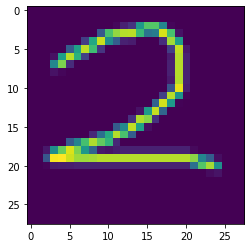

In [29]:
img = Image.open("test2.png")
img = img.convert("L")
img = img.resize((28,28))
img = PIL.ImageOps.invert(img)
plt.imshow(img)


In [26]:
img = np.array(img)
img = img / 255
image = torch.from_numpy(img)
image = image.float()

In [27]:
result = network.forward(image.view(-1, 28*28))
print(torch.argmax(output))

tensor(2)
